## The Best-Worst Neighborhood
#### Team Proficient Pandas


##### **Introduction**
*Our group decided to explore the question "What is the most dangerous neighborhood to live in in Pittsburgh?" With data from the WPRDC, we settled on three factors that determine how dangerous a neighborhood may be to live in. The first factor we chose was COVID-19. We used a data set "COVID-19 Counts by Municipality and Neighborhood" to determine how well each neighborhood was handling the current pandemic. The next factor we thought was important was gun-violence. For this factor we used the data set "Firearm Seizures Data" in order to find out which neighborhood had the most reports of firearms being seized there. We thought that this was the best way to determine the threat of gun-violence in each neighborhood. Finally, we used "Allegheny County Median Age at Death" to determine which neighborhoods had the lowest median age at death. We thought this was a factor in being the most dangerous because people dying at younger ages means that there is likely other factors causing the median age at death to decrease. Overall, we concluded that the most dangerous neighborhood in Pittsburgh would be the one that has a combination of the most covid cases, the most firearms being seized, and the lowest median age at death.*

##### **Metrics**
*We decided to score each dataset individually and then use a loop to find overlap in the top 35 most dangerous neighborhoods of each dataset and finally rank those neighborhoods based on where they scored on the datasets.*
 - Position 1: 1 POINT
 - Position 2: 2 POINTS
 - Position 3: 3 POINTS
 
*And so on. The lowest scoring neighborhood of the ones that overlap would be deemed the most dangerous neighborhood in Pittsburgh.*

In [16]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

**Caleb's Personal Notebook**

**Kyra's Personal Notebook**

**Emily's Personal Notebook**

In [17]:
result_covid = pd.read_csv("result_covid.csv", usecols = ["neighborhood_municipality", "cases_per_100_indv"])
result_covid.to_csv("covid.csv")
result_firearms = pd.read_csv("result_firearms.csv", usecols = ["neighborhood", "total_count"])
result_firearms.to_csv("firearms.csv")
result_deaths = pd.read_csv("result_deaths.csv", usecols = ["NEIGHBORHOOD", "TOTAL MD AGE AT DEATH"])
result_deaths.to_csv("deaths.csv")

In [18]:
neighborhood_covid_dict = {}
covid_graph = {}
neighborhood_fire_dict = {}
firearms_graph = {}
neighborhood_deaths_dict = {}
deaths_graph = {}

In [19]:
with open("covid.csv",'r') as data: 
    next(data)
    for line in csv.reader(data): 
        val = int(line[0]) + 1
        if line[1].lower() not in neighborhood_covid_dict:
            neighborhood_covid_dict[line[1].lower()] = val
        else:
            neighborhood_covid_dict[line[1].lower()] = val + neighborhood_covid_dict[line[1].lower()]
        covid_graph[line[1].lower()] = 1
            
print (neighborhood_covid_dict)
print()

with open("firearms.csv",'r') as data: 
    next(data)
    for line in csv.reader(data): 
        val = int(line[0]) + 1
        if line[1].lower() not in neighborhood_fire_dict:
            neighborhood_fire_dict[line[1].lower()] = val
        else:
            neighborhood_fire_dict[line[1].lower()] = val + neighborhood_fire_dict[line[1].lower()]
        firearms_graph[line[1].lower()] = 1
            
print (neighborhood_fire_dict)
print()

with open("deaths.csv",'r') as data: 
    next(data)
    for line in csv.reader(data): 
        val = int(line[0]) + 1
        if line[1].lower() not in neighborhood_deaths_dict:
            neighborhood_deaths_dict[line[1].lower()] = val
        else:
            neighborhood_deaths_dict[line[1].lower()] = val + neighborhood_deaths_dict[line[1].lower()]
        deaths_graph[line[1].lower()] = 1

print (neighborhood_deaths_dict)

{'glen hazel': 1, 'central oakland': 2, 'baldwin borough': 3, 'whitehall': 4, 'south oakland': 5, 'haysville': 6, 'new homestead': 7, 'mount oliver borough': 8, 'chalfant': 9, 'hays': 10, 'glenfield': 11, 'crafton heights': 12, 'westwood': 13, 'banksville': 14, 'southside slopes': 15, 'versailles': 16, 'whitaker': 17, 'esplen': 18, 'ingram': 19, 'stowe': 20, 'southside flats': 21, 'undefined': 22, 'west homestead': 23, 'manchester': 24, 'knoxville': 25, 'terrace village': 26, 'beltzhoover': 27, 'bedford dwellings': 28, 'duquesne': 29, 'jefferson hills': 30, 'carrick': 31, 'scott': 32, 'homewood north': 33, 'brentwood': 34, 'castle shannon': 35}

{'homewood south': 1, 'south side flats': 2, 'homewood north': 3, 'larimer': 4, 'carrick': 5, 'hazelwood': 6, 'perry south': 7, 'central business district': 8, 'sheraden': 9, 'marshall-shadeland': 10, 'lincoln-lemington-belmar': 11, 'garfield': 12, 'middle hill': 13, 'knoxville': 14, 'mount washington': 15, 'east hills': 16, 'brighton heights':

In [20]:
overlap = neighborhood_fire_dict.keys() & neighborhood_deaths_dict.keys() & neighborhood_covid_dict.keys()

In [21]:
all_dict = {}
with open("deaths.csv",'r') as data: 
    next(data)
    for line in csv.reader(data): 
        val = int(line[0]) + 1
        if line[1].lower() not in all_dict:
            all_dict[line[1].lower()] = val
        else:
            all_dict[line[1].lower()] = val + all_dict[line[1].lower()]
            
with open("firearms.csv",'r') as data: 
    next(data)
    for line in csv.reader(data): 
        val = int(line[0]) + 1
        if line[1].lower() not in all_dict:
            all_dict[line[1].lower()] = val
        else:
            all_dict[line[1].lower()] = val + all_dict[line[1].lower()]

with open("covid.csv",'r') as data: 
    next(data)
    for line in csv.reader(data): 
        val = int(line[0]) + 1
        if line[1].lower() not in all_dict:
            all_dict[line[1].lower()] = val
        else:
            all_dict[line[1].lower()] = val + all_dict[line[1].lower()]
            
print (sorted(all_dict.items(), key=lambda x: x[1], reverse = False))

[('homewood south', 1), ('glen hazel', 1), ('south side flats', 2), ('central oakland', 2), ('baldwin borough', 3), ('whitehall', 4), ('california-kirkbride', 5), ('south oakland', 5), ('haysville', 6), ('perry south', 7), ('new homestead', 7), ("troy hill/herr's island", 8), ('mount oliver borough', 8), ('chalfant', 9), ('hays', 10), ('friendship', 11), ('lincoln-lemington-belmar', 11), ('glenfield', 11), ('westwood', 13), ('banksville', 14), ('mount washington', 15), ('southside slopes', 15), ('spring garden', 16), ('versailles', 16), ('marshall-shadeland', 17), ('brighton heights', 17), ('whitaker', 17), ('elliott', 18), ('esplen', 18), ('polish hill', 19), ('ingram', 19), ('stowe', 20), ('southside flats', 21), ('undefined', 22), ('allentown', 23), ('point breeze north', 23), ('beechview', 23), ('west homestead', 23), ('spring hill-city view', 24), ('east hills', 26), ('sheraden', 26), ('hazelwood', 26), ('arlington', 26), ('east allegheny', 27), ('upper lawrenceville', 27), ('craw

In [22]:
for neighborhood in overlap:
    print(neighborhood + ": " + str(all_dict[neighborhood]))

terrace village: 72
bedford dwellings: 60
manchester: 47
homewood north: 69
knoxville: 53
carrick: 71


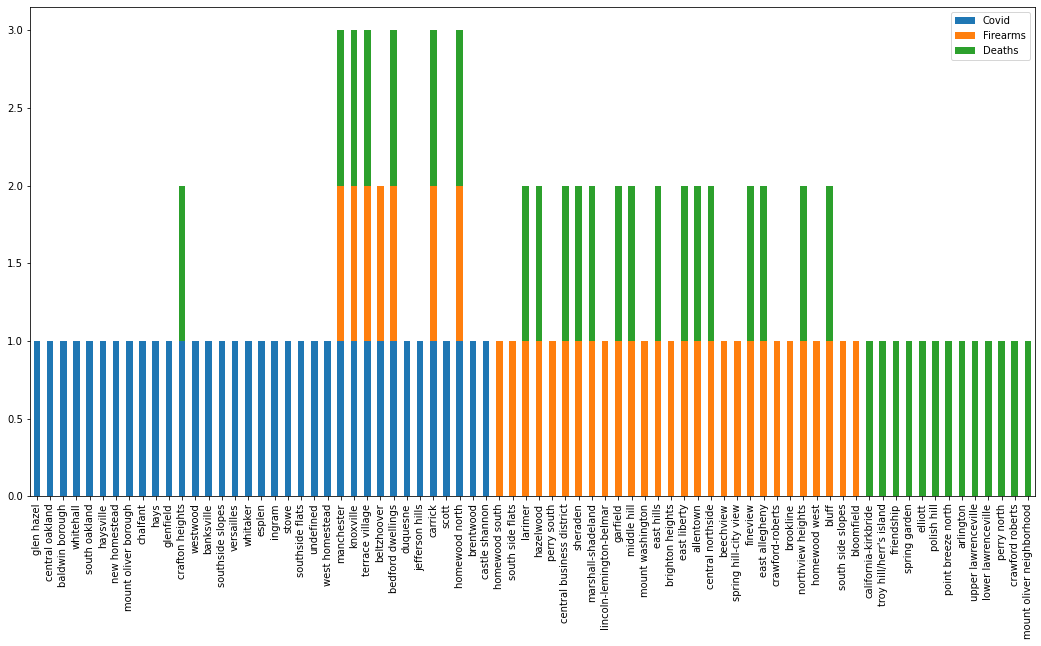

In [31]:
graph_dict = {}
graph_dict["Covid"] = covid_graph
graph_dict["Firearms"] = firearms_graph
graph_dict["Deaths"] = deaths_graph

graph_dataframe = pd.DataFrame(graph_dict)
graph_dataframe.plot.bar(figsize = [18, 9], stacked=True)
plt.show()